# Customer Churn Prediction

## Introduction

In [ ]:
Customer Churn prediction means knowing which customers are likely to unsubscribe from your service. For many companies, 
this is an important prediction. if we identified that customer might leave or cancel thier subscription then we can make some 
efforts in order to retain them.
Customers have different behaviors and preferences and might have different resons for cancelling their subscriptions. 
Therefore, it is important to actively communicate with each of them to keep them try to retain them by solving their issues

A company with a high churn rate loses many subscribers, resulting in bad impact on their buisness.
Companies with low churn rates can retain customers.
In this project we will try to find out what factors may affect the churn rate accordingly we van workto increase our performance.

## Data Preprocessing

In [11]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [12]:
# Loading customer churn  data set 

df= pd.read_excel("C:\\Users\\hp\\Jupyter Notebook\\Datasets\\customer_churn_large_dataset.xlsx")

df.head(10)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
5,6,Customer_6,67,Male,New York,15,82.65,456,1
6,7,Customer_7,30,Female,Chicago,3,73.79,269,0
7,8,Customer_8,67,Female,Miami,1,97.70,396,1
8,9,Customer_9,20,Female,Miami,10,42.45,150,1
9,10,Customer_10,53,Female,Los Angeles,12,64.49,383,1


In [3]:
df.shape

(100000, 9)

In [4]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


Here we can see datatypes of each columns are correct. So need not to do any conversion here.

In [6]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


<Axes: >

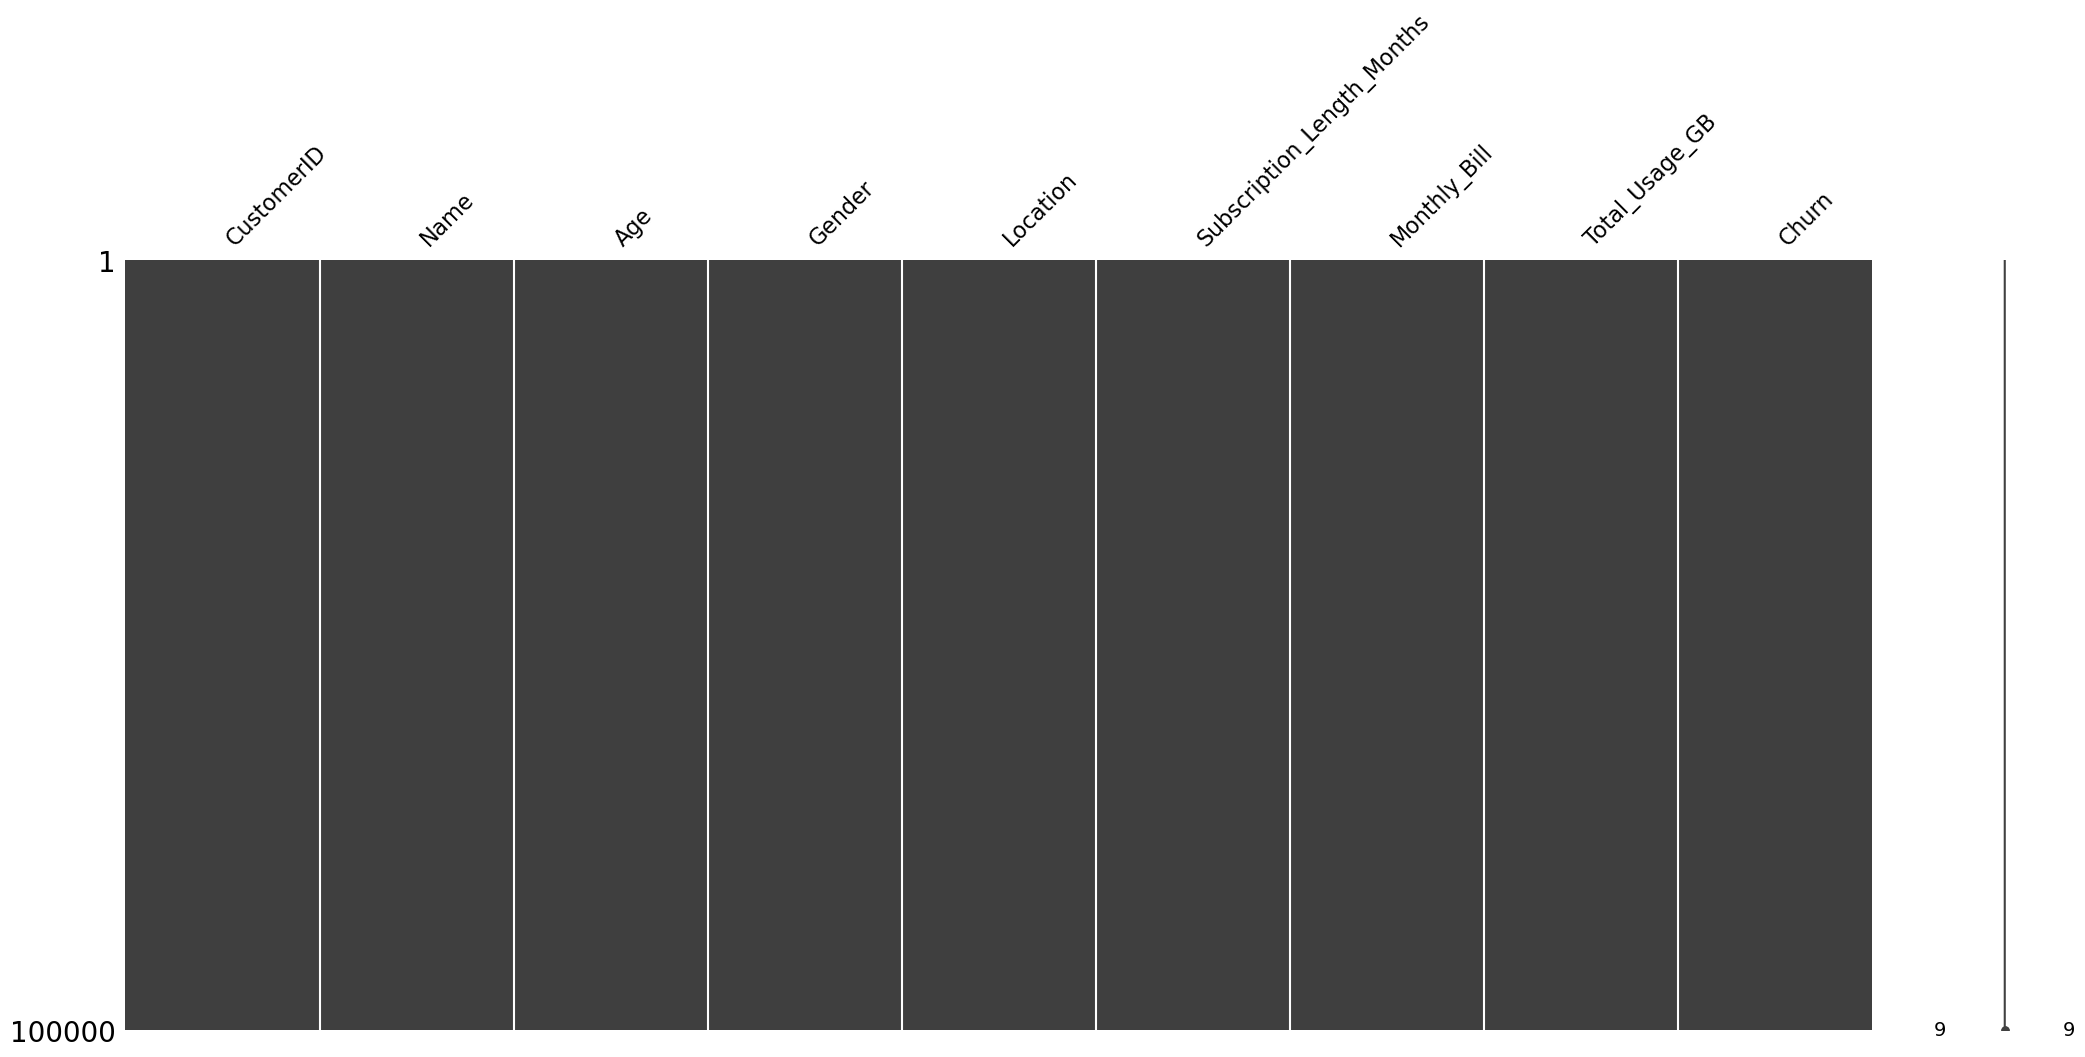

In [7]:
#Checking missing values
# Visualizing missing values

msno.matrix(df)


from the above visualisation , we can observe that it has no peculiar pattern which indiates missing values

In [8]:
df.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

from the above data it is clearly visible that there are not any missing value in the dataset

In [9]:
# Checking null values
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

There is not any null value in the dataset.

In [10]:
#Male and Female count who are still continuing the service
df['Churn'][df['Churn']==0].groupby(df['Gender']).count()

Gender
Female    25272
Male      24949
Name: Churn, dtype: int64

Male and Female count who are still continuing the service

In [11]:
#Male and Female Count who migrate to anther servie provider
df['Churn'][df['Churn']==1].groupby(df['Gender']).count()


Gender
Female    24944
Male      24835
Name: Churn, dtype: int64

Male and Female Count who migrate to anther servie provider

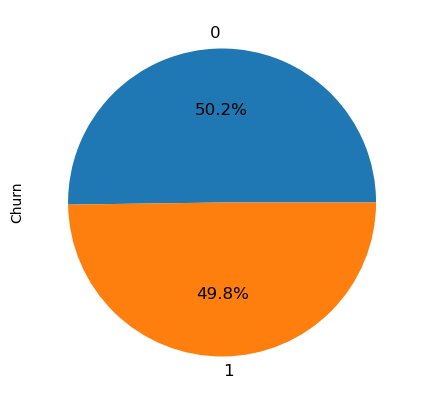

In [12]:
#Diatribution of churn
ax = df['Churn'].value_counts().plot.pie(autopct='%.1f%%', labels = ['0', '1'],figsize =(5,5), fontsize = 12 ) 

[Text(0, 0, '25272'),
 Text(0, 0, '24949'),
 Text(0, 0, '24944'),
 Text(0, 0, '24835')]

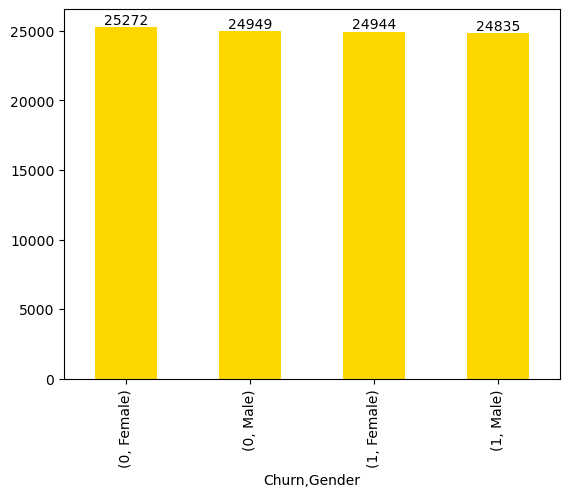

In [13]:
# We will see the churn distribution as per gender
ax=df.groupby(['Churn','Gender'])['Churn'].count().plot(kind='bar',color='gold')

ax.bar_label(ax.containers[0])

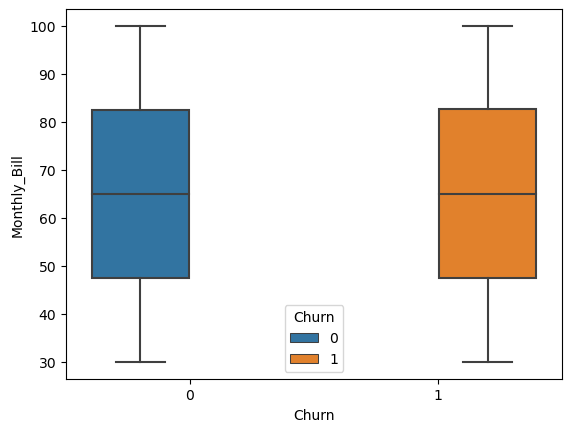

In [16]:
sns.boxplot(data=df,y='Monthly_Bill',x='Churn', hue= 'Churn')
plt.show()

Here we can observe that there is no significant difference in churn based on Monthly bills.

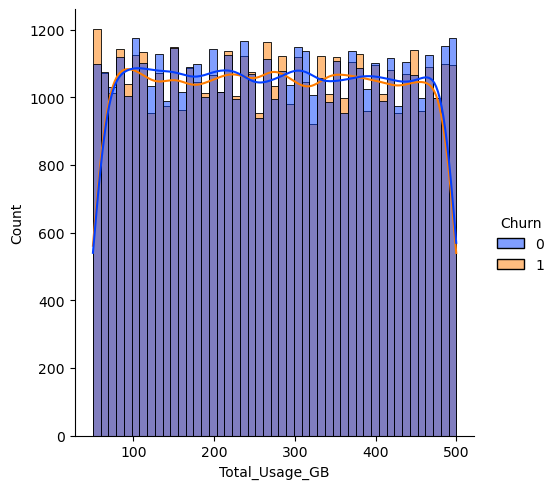

In [17]:
#Churn by Total usage

sns.displot(data=df, x='Total_Usage_GB', hue='Churn',kde= True, color='#3F7F7F',palette="bright")


So here we can observe that Monthly bill and total Usage has no significant impact on Churn.

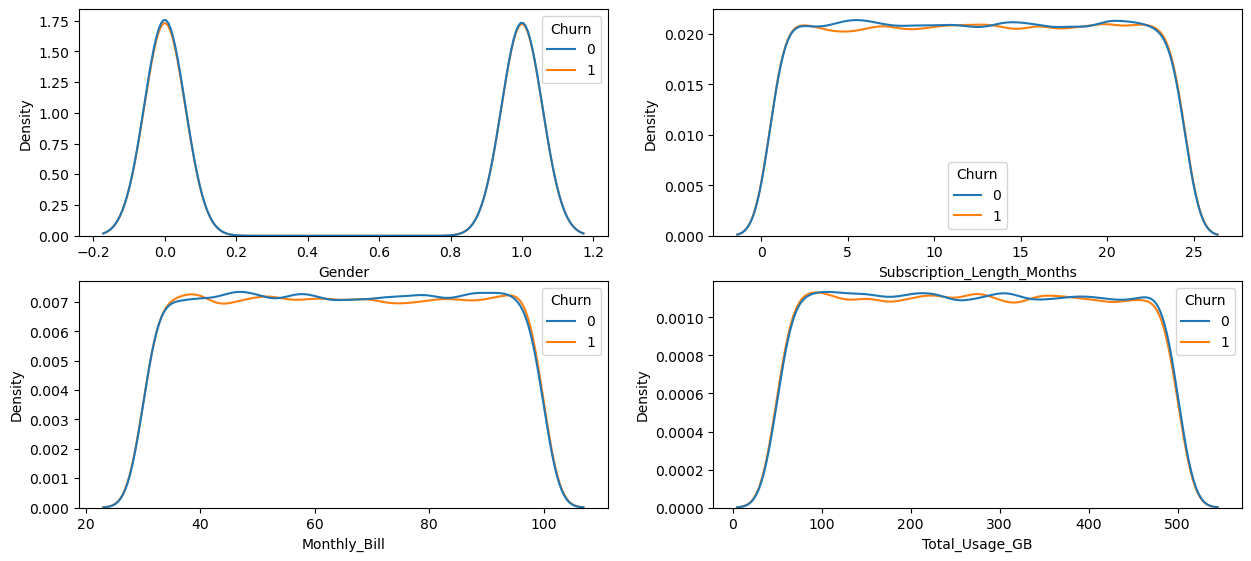

In [18]:
var=['Gender','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']
plt.subplots(2,2,figsize=(15,10))
for i in range(1,len(var)+1):
    plt.subplot(3,2,i)
    sns.kdeplot(data=df,x=var[i-1],hue='Churn')
plt.show()

From above observation we can see that Churn is not affected by any of the parameters like Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB. 

In [24]:
# Customer id ,Name and Location are not affcting wheather customer is churn or not. So we will drop this column

# df.drop(['CustomerID','Name','Location'],axis=1,inplace=True)
df.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,17,73.36,236,0
1,62,Female,1,48.76,172,0
2,24,Female,5,85.47,460,0
3,36,Female,3,97.94,297,1
4,46,Female,19,58.14,266,0


## Splitting the data into train and test sets

Since CUstomer ID ,Name Location value don't affect the churn rate .So we will delete these column

In [ ]:
df.drop(['CustomerID','Name','Location'],inplace=True,axis=1)

Since Gender column as categorical data we need convert it to numeric  data to
train and predict the model

In [78]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Gender']=label.fit_transform(df['Gender'])
df.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,17,73.36,236,0
1,62,0,1,48.76,172,0
2,24,0,5,85.47,460,0
3,36,0,3,97.94,297,1
4,46,0,19,58.14,266,0


Gender value 1 means 'Male' and 0 means 'Female'

In [79]:
# Selecting feature and target data
x=df.drop('Churn',axis=1)
y= df['Churn']



In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=7)


In [81]:
print("Shape of x train",x_train.shape)
print("Shape of x test",x_test.shape)
print("Shape of y train",y_train.shape)
print("Shape of y test",y_test.shape)

Shape of x train (80000, 5)
Shape of x test (20000, 5)
Shape of y train (80000,)
Shape of y test (20000,)


In [82]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)
df.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,17,73.36,236,0
1,62,0,1,48.76,172,0
2,24,0,5,85.47,460,0
3,36,0,3,97.94,297,1
4,46,0,19,58.14,266,0


In [45]:
df.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,17,73.36,236,0
1,62,Female,1,48.76,172,0
2,24,Female,5,85.47,460,0
3,36,Female,3,97.94,297,1
4,46,Female,19,58.14,266,0


## Model selection ,Evaluation and Optimization

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrix(y_pred,y_test):
    cm= confusion_matrix(y_pred,y_test)
    print("Confusion Matrix = ", cm)
    disp=ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()
    

## Logistic Regression

In [126]:
lr= LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
Accuracy= accuracy_score(y_test,y_pred)
print("Accuracy = ",Accuracy)

print(precision_score(y_test,y_pred))
lr.score(x_test,y_test)

Accuracy =  0.4978
0.5004299226139295


0.4978

Confusion Matrix =  [[8792 1162]
 [8882 1164]]


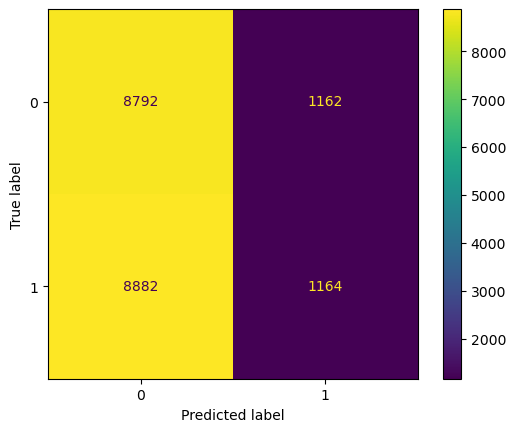

In [66]:
plot_confusion_matrix(y_test,y_pred)

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.88      0.64      9954
           1       0.50      0.12      0.19     10046

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.41     20000
weighted avg       0.50      0.50      0.41     20000



## Decision tree

0.49925
Confusion Matrix =  [[5052 4902]
 [5113 4933]]


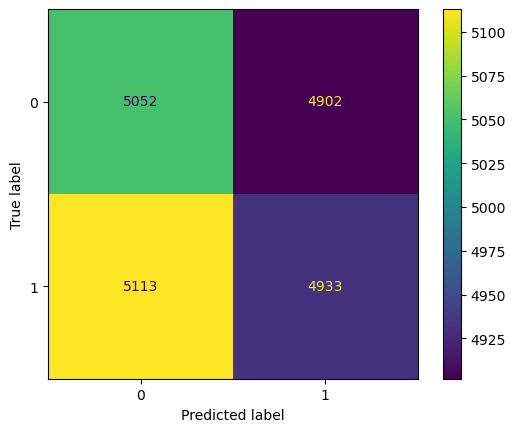

In [69]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred= dtree.predict(x_test)
Acc= accuracy_score(y_test,y_pred)
print(Acc)
plot_confusion_matrix(y_test,y_pred)

## XGBoost

Accuracy =  0.5005974426418863
Confusion Matrix =  [[5302 4652]
 [5339 4707]]


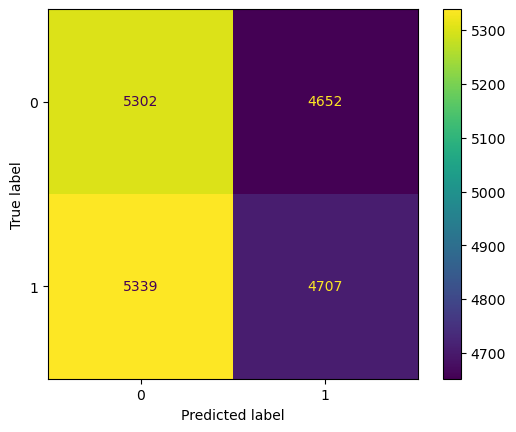

Validation score [0.50625 0.5031  0.50305 0.49765 0.50205]


In [105]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score


xgb= XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
Accuracy= roc_auc_score(y_test,y_pred)
print("Accuracy = ",Accuracy)

xgb.score(x_test,y_test)
plot_confusion_matrix(y_test,y_pred)



In [106]:
# Cross Validation of 
scores=cross_val_score(xgb,x,y,cv=5)
print("Validation score",scores)

Validation score [0.50625 0.5031  0.50305 0.49765 0.50205]


## ANN Model

In [90]:
import tensorflow as tf
#import keras 
from tensorflow import keras
model = keras.Sequential([
    # input layer
    keras.layers.Dense(19,activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10,activation = 'relu'),
    # we use sigmoid for binary output
    # output layer
    keras.layers.Dense(1, activation='sigmoid')
]
)


In [91]:
x_traint = tf.convert_to_tensor(x_train)
y_traint = tf.convert_to_tensor(y_train)
x_testt = tf.convert_to_tensor(x_test)
y_testt = tf.convert_to_tensor(y_test)

In [92]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
# now we fit our model to training data
model.fit(x_traint,y_traint,epochs=100)

Epoch 1/100
2500/2500 [==============================] - 13s 3ms/step - loss: 0.6940 - accuracy: 0.5005
Epoch 2/100
2500/2500 [==============================] - 7s 3ms/step - loss: 0.6933 - accuracy: 0.5014
Epoch 3/100
2500/2500 [==============================] - 7s 3ms/step - loss: 0.6932 - accuracy: 0.5023
Epoch 4/100
2500/2500 [==============================] - 7s 3ms/step - loss: 0.6932 - accuracy: 0.5006
Epoch 5/100
2500/2500 [==============================] - 7s 3ms/step - loss: 0.6932 - accuracy: 0.5026
Epoch 6/100
2500/2500 [==============================] - 7s 3ms/step - loss: 0.6931 - accuracy: 0.5042
Epoch 7/100
2500/2500 [==============================] - 7s 3ms/step - loss: 0.6931 - accuracy: 0.5066
Epoch 8/100
2500/2500 [==============================] - 9s 3ms/step - loss: 0.6930 - accuracy: 0.5073
Epoch 9/100
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6930 - accuracy: 0.5073
Epoch 10/100
2500/2500 [==============================] - 8s 3ms/step - 

KeyboardInterrupt: 

In [ ]:
# evalute the model
model.evaluate(x_testt,y_testt)

In [95]:
# predict the churn values
y_pred = model.predict(x_test)
print(y_pred)
# unscaling the ypred values 
ypred_lis = []
for i in y_pred:
    if i>0.5:
        ypred_lis.append(1)
    else:
        ypred_lis.append(0)
print(ypred_lis)

625/625 [==============================] - 1s 2ms/step
[[0.48978758]
 [0.46943778]
 [0.5162024 ]
 ...
 [0.48845407]
 [0.53273124]
 [0.54696184]]
[0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [96]:
#make dataframe for comparing the orignal and predict values
data = {'orignal_churn':y_test, 'predicted_churn':ypred_lis}
df_check = pd.DataFrame(data)
df_check.head(10)

,orignal_churn,predicted_churn
0,1.0,0
1,0.0,0
2,1.0,1
3,1.0,1
4,0.0,1
5,0.0,1
6,0.0,1
7,0.0,0
8,1.0,1
9,1.0,0


In [97]:
# checking for performance metrices
#importing classification_report and confusion metrics
from sklearn.metrics import confusion_matrix, classification_report
#print classification_report
print(classification_report(y_test,ypred_lis))

              precision    recall  f1-score   support

         0.0       0.50      0.30      0.38      9954
         1.0       0.50      0.70      0.58     10046

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.48     20000
weighted avg       0.50      0.50      0.48     20000



In [ ]:
We trained data on various model and observed that almost all the models give similar
accuracy rate around 50%.


In [128]:
import pickle
pickle.dump(lr,open('model.pkl','wb'))